# EDA Analisis Exploratorio de datos

Importamos

In [1]:
# En caso de ser necesario:
# %pip install folium
# %pip install geopandas
#%pip install geojson
#%pip install sketch
#%pip install summarytools

In [2]:
import re
import folium
import geojson
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sketch
from folium.plugins import HeatMap
from shapely.geometry import Point, Polygon
from summarytools import dfSummary
from data_utils import data_type_check_EDA
from shapely.geometry import Point

import warnings  # Warnings se utiliza para gestionar advertencias y filtrarlas si es necesario
warnings.filterwarnings("ignore")

Cargamos los dataset     

In [3]:
siniestro = pd.read_csv("../0 Dataset/siniestro_listo.csv")


 Resumen del DataFrame 'siniestro': 

Dimensiones:  (717, 26)
                  columna  no_nulos  %_no_nulos  nulos  %_nulos tipo_dato
0                      ID       717      100.00      0     0.00    object
1                     Rol       717      100.00      0     0.00    object
2                 Acusado       717      100.00      0     0.00    object
3                 Victima       717      100.00      0     0.00    object
4                    Sexo       717      100.00      0     0.00    object
5                    Edad       717      100.00      0     0.00     int64
6            Rango etario       717      100.00      0     0.00    object
7                     Año       717      100.00      0     0.00     int64
8                     Mes       717      100.00      0     0.00     int64
9                     Día       717      100.00      0     0.00     int64
10             Día semana       717      100.00      0     0.00    object
11                   Hora       716       99.86  

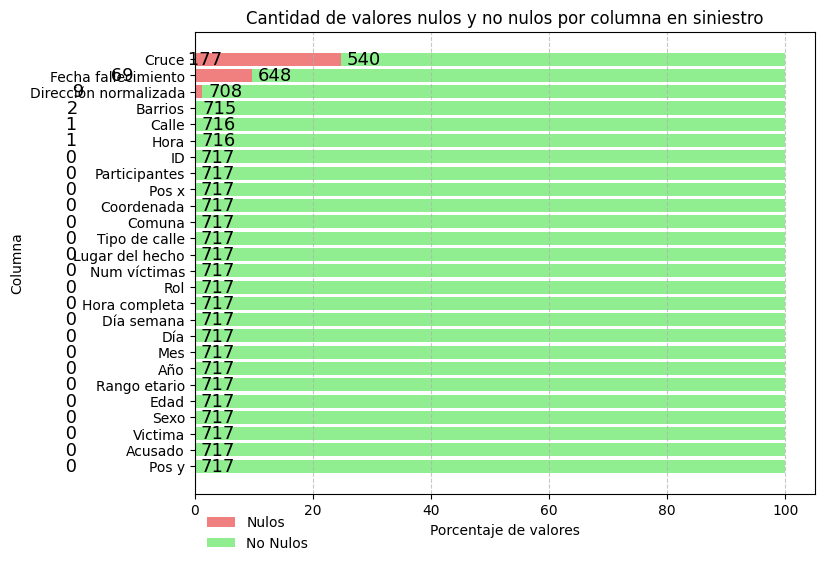

In [4]:
data_type_check_EDA(siniestro)

___
# 1_ Descripcion general de los datos

In [5]:
siniestro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     717 non-null    object 
 1   Rol                    717 non-null    object 
 2   Acusado                717 non-null    object 
 3   Victima                717 non-null    object 
 4   Sexo                   717 non-null    object 
 5   Edad                   717 non-null    int64  
 6   Rango etario           717 non-null    object 
 7   Año                    717 non-null    int64  
 8   Mes                    717 non-null    int64  
 9   Día                    717 non-null    int64  
 10  Día semana             717 non-null    object 
 11  Hora                   716 non-null    float64
 12  Hora completa          717 non-null    object 
 13  Num víctimas           717 non-null    int64  
 14  Participantes          717 non-null    object 
 15  Fecha 

### Descripcion Estadistica

In [6]:
siniestro.describe()

,Edad,Año,Mes,Día,Hora,Num víctimas,Pos x,Pos y
count,717.000000,717.000000,717.000000,717.000000,716.000000,717.000000,717.000000,717.000000
mean,39.050209,2018.174338,6.688982,15.953975,11.554469,1.061367,-57.382053,-33.992006
std,22.010669,1.672655,3.575140,8.674876,6.700055,0.257024,7.803187,4.622508
min,0.000000,2016.000000,1.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250
25%,24.000000,2017.000000,4.000000,9.000000,6.000000,1.000000,-58.475768,-34.643577
50%,35.000000,2018.000000,7.000000,16.000000,11.000000,1.000000,-58.442636,-34.622451
75%,55.000000,2019.000000,10.000000,23.000000,17.000000,1.000000,-58.399147,-34.594883
max,95.000000,2021.000000,12.000000,31.000000,23.000000,3.000000,0.000000,0.000000


### Chequeo de nulos, tipos de datos


 Resumen del DataFrame 'siniestro': 

Dimensiones:  (717, 26)
                  columna  no_nulos  %_no_nulos  nulos  %_nulos tipo_dato
0                      ID       717      100.00      0     0.00    object
1                     Rol       717      100.00      0     0.00    object
2                 Acusado       717      100.00      0     0.00    object
3                 Victima       717      100.00      0     0.00    object
4                    Sexo       717      100.00      0     0.00    object
5                    Edad       717      100.00      0     0.00     int64
6            Rango etario       717      100.00      0     0.00    object
7                     Año       717      100.00      0     0.00     int64
8                     Mes       717      100.00      0     0.00     int64
9                     Día       717      100.00      0     0.00     int64
10             Día semana       717      100.00      0     0.00    object
11                   Hora       716       99.86  

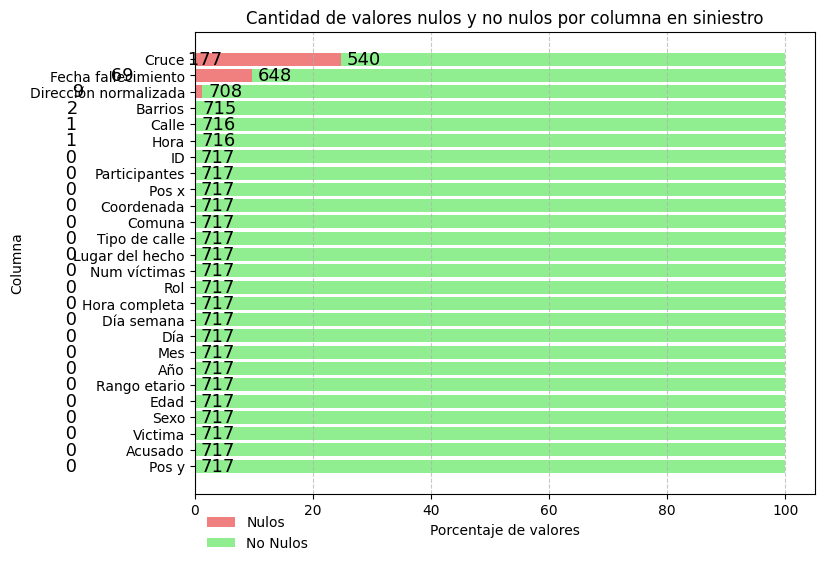

In [7]:
data_type_check_EDA(siniestro)

### Correlaciones de Variables Númericas

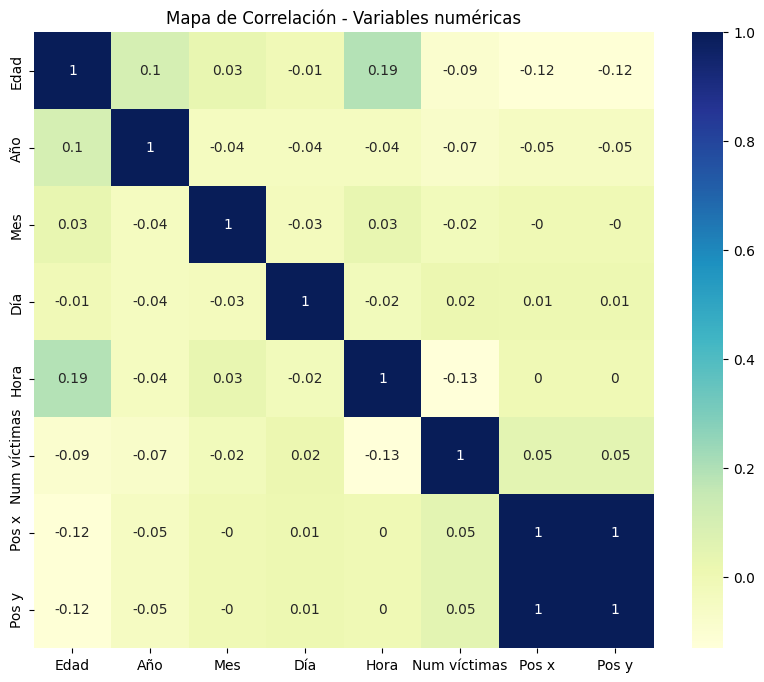

In [8]:
dataNumerica = siniestro.select_dtypes(include=["number"])

corr = dataNumerica.corr().round(2)


plt.figure(figsize=(10, 8))

sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("Mapa de Correlación - Variables numéricas")

plt.show()

**Conclusion:**


* Podemos notar una correlación positiva leve entre la edad de las víctimas y la hora(0.19) en la que ocurrieron los incidentes.

* En cuanto a las demás correlaciones, estas son principalmente negativas. 

* Esto era de esperarse, dado que el número de víctimas en un siniestro no está necesariamente vinculado a una fecha o hora específica, sino que puede depender de una variedad de factores.

### EDAD: Detección de outliers
Se realiza la busqueda de datos con valores atípicos en las features, y se analiza si es necesario eliminarlos.


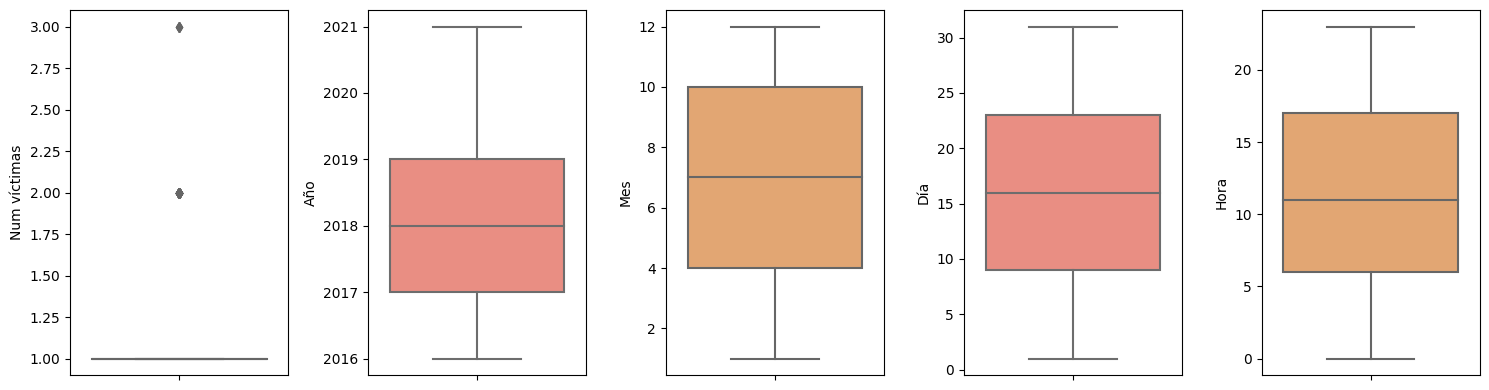

In [9]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 4))

# Definir las columnas a visualizar en los subplots
columnas = ['Num víctimas', 'Año', 'Mes', 'Día', 'Hora']

# Iterar sobre las columnas y crear los subplots
for i, columna in enumerate(columnas, start=1):
    plt.subplot(1, 5, i) 
    sns.boxplot(data=siniestro, y=columna, color="#FA8072" if i % 2 == 0 else "#F4A460")
    plt.ylabel(columna)
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()


Los outliers en Num Victimas (2 o 3) se producen porque en la mayoria de los casos, el registro es el valor 1.

Descripcion estadistica de Edades

In [10]:
siniestro["Edad"].describe()  

count    717.000000
mean      39.050209
std       22.010669
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

___
# 2_ Análisis de variables relacionadas con las víctimas

### Edad y sexo

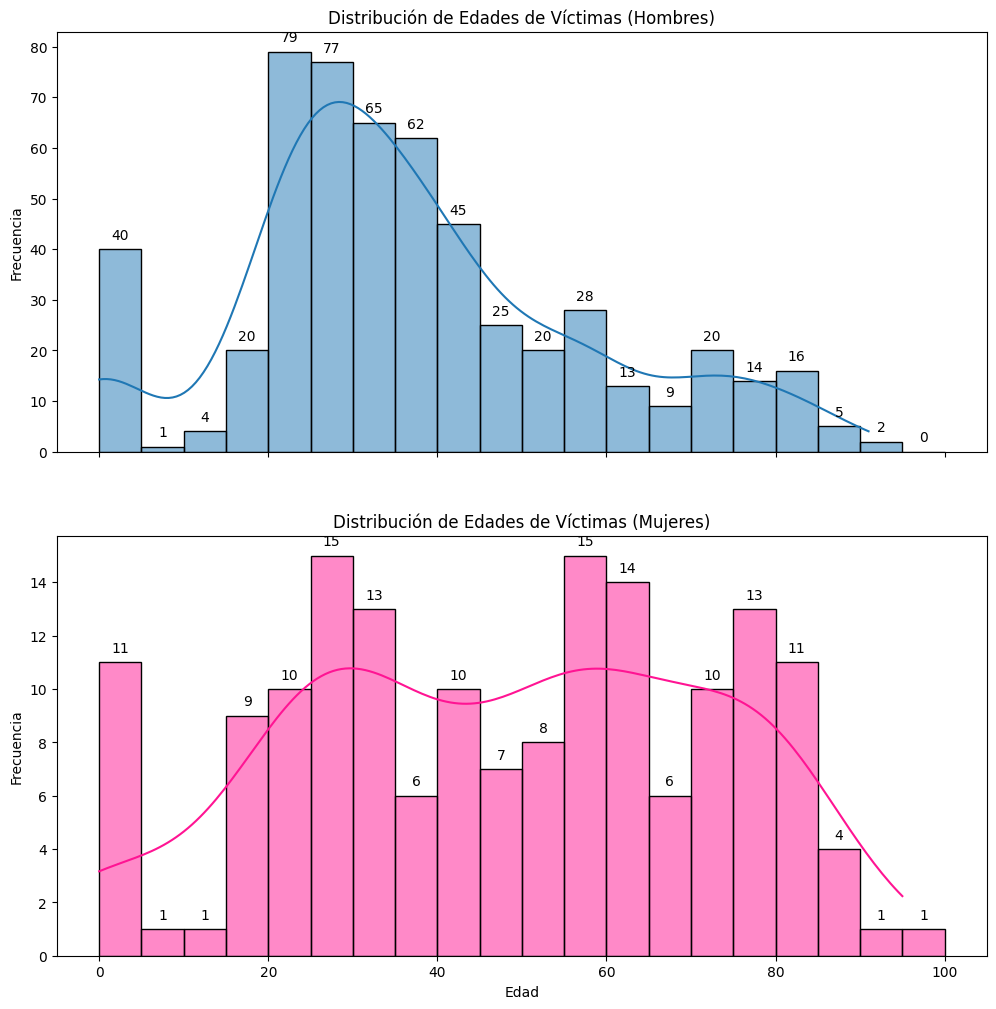

In [11]:
# Filtro los datos para hombres y mujeres
df_hombres = siniestro[(siniestro['Sexo'] == 'MASCULINO') & (siniestro['Sexo'] != 'SD')]
df_mujeres = siniestro[(siniestro['Sexo'] == 'FEMENINO') & (siniestro['Sexo'] != 'SD')]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

# Definir una paleta de colores
colores = ["#1f77b4", "#ff1493"]  # Azul y hotpink

# Definir los límites de los bins para la distribución más detallada de edades
bins = range(0, 101, 5)  # Rangos de 5 en 5 años hasta los 100 años

# hombres
sns.histplot(df_hombres['Edad'], bins=bins, kde=True, color=colores[0], edgecolor="black", ax=axes[0])
axes[0].set_title('Distribución de Edades de Víctimas (Hombres)')
axes[0].set_ylabel('Frecuencia')

# Añadir contadores para cada barra en el histograma de hombres
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

# mujeres
sns.histplot(df_mujeres['Edad'], bins=bins, kde=True, color=colores[1], edgecolor="black", ax=axes[1])
axes[1].set_title('Distribución de Edades de Víctimas (Mujeres)')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Frecuencia')

# Añadir contadores para cada barra en el histograma de mujeres
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.show()

**Conclusion:**
- Mientras mas joven es el hombre es mas propenso a accidentes.
- Mientras que en las mujeres esto es mucho mas uniforme.

### Edad por rol y sexo

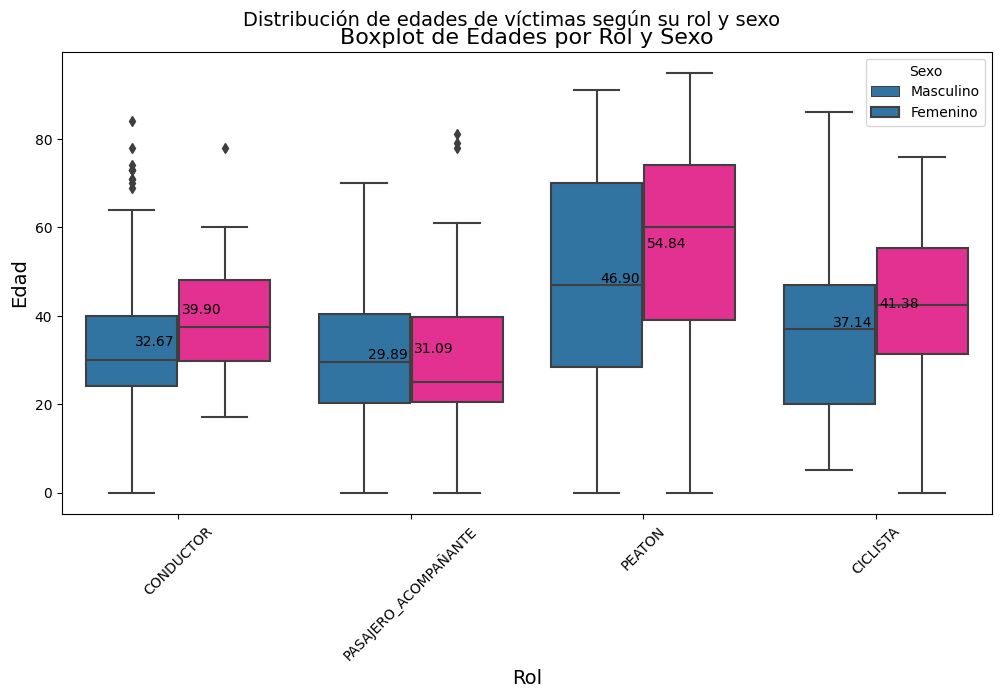

In [12]:
# Definir una paleta de colores personalizada similar al código anterior
custom_palette = ['#1f77b4', '#ff1493']  # Azul y hotpink

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Filtrar el DataFrame para excluir "SD" en las columnas de Sexo y Rol
siniestro_filtered = siniestro[(siniestro['Sexo'] != "SD") & (siniestro['Rol'] != "SD")]

# Verificar si hay datos después de aplicar los filtros
if siniestro_filtered.empty:
    print("No hay datos después de aplicar los filtros.")
else:
    # Crear el boxplot con la paleta de colores personalizada
    sns.boxplot(
        x='Rol', 
        y='Edad', 
        hue='Sexo', 
        data=siniestro_filtered, 
        palette=custom_palette
    )

    # Título y subtítulo informativo
    plt.title('Boxplot de Edades por Rol y Sexo', fontsize=16)
    plt.suptitle('Distribución de edades de víctimas según su rol y sexo', fontsize=14, y=0.95)

    # Etiquetas de los ejes
    plt.xlabel('Rol', fontsize=14)
    plt.ylabel('Edad', fontsize=14)

    # Mostrar la leyenda con información sobre los colores
    plt.legend(title='Sexo', labels=['Masculino', 'Femenino'])

    # Rotar las etiquetas del eje x para mayor claridad
    plt.xticks(rotation=45)

    # Agregar líneas para mediana y cuartiles
    for container in plt.gca().artists:
        if isinstance(container, plt.Line2D):
            # Cambiar el estilo de la línea para la mediana
            container.set_linestyle('--')
        elif isinstance(container, plt.collections.PathCollection):
            # Cambiar el tamaño de los puntos de los cuartiles
            container.set_sizes([5])

    # Agregar los valores de la media de cada columna dentro del boxplot
    for i, col in enumerate(siniestro_filtered['Rol'].unique()):
        for j, sex in enumerate(siniestro_filtered['Sexo'].unique()):
            subset = siniestro_filtered[(siniestro_filtered['Rol'] == col) & (siniestro_filtered['Sexo'] == sex)]
            mean_value = subset['Edad'].mean()
            plt.text(i + j*0.2 - 0.1, mean_value + 0.5, f'{mean_value:.2f}', ha='center', color='black', fontsize=10)

    # Mostrar el gráfico
    plt.show()

**Conclusion:**
- Se pueden observar las edades medias para cada victima dependiendo de su movilidad. 
- Se puede observar que las victimas que viajan con menos movilidad tienen una mayor edad.

### Edad y rol

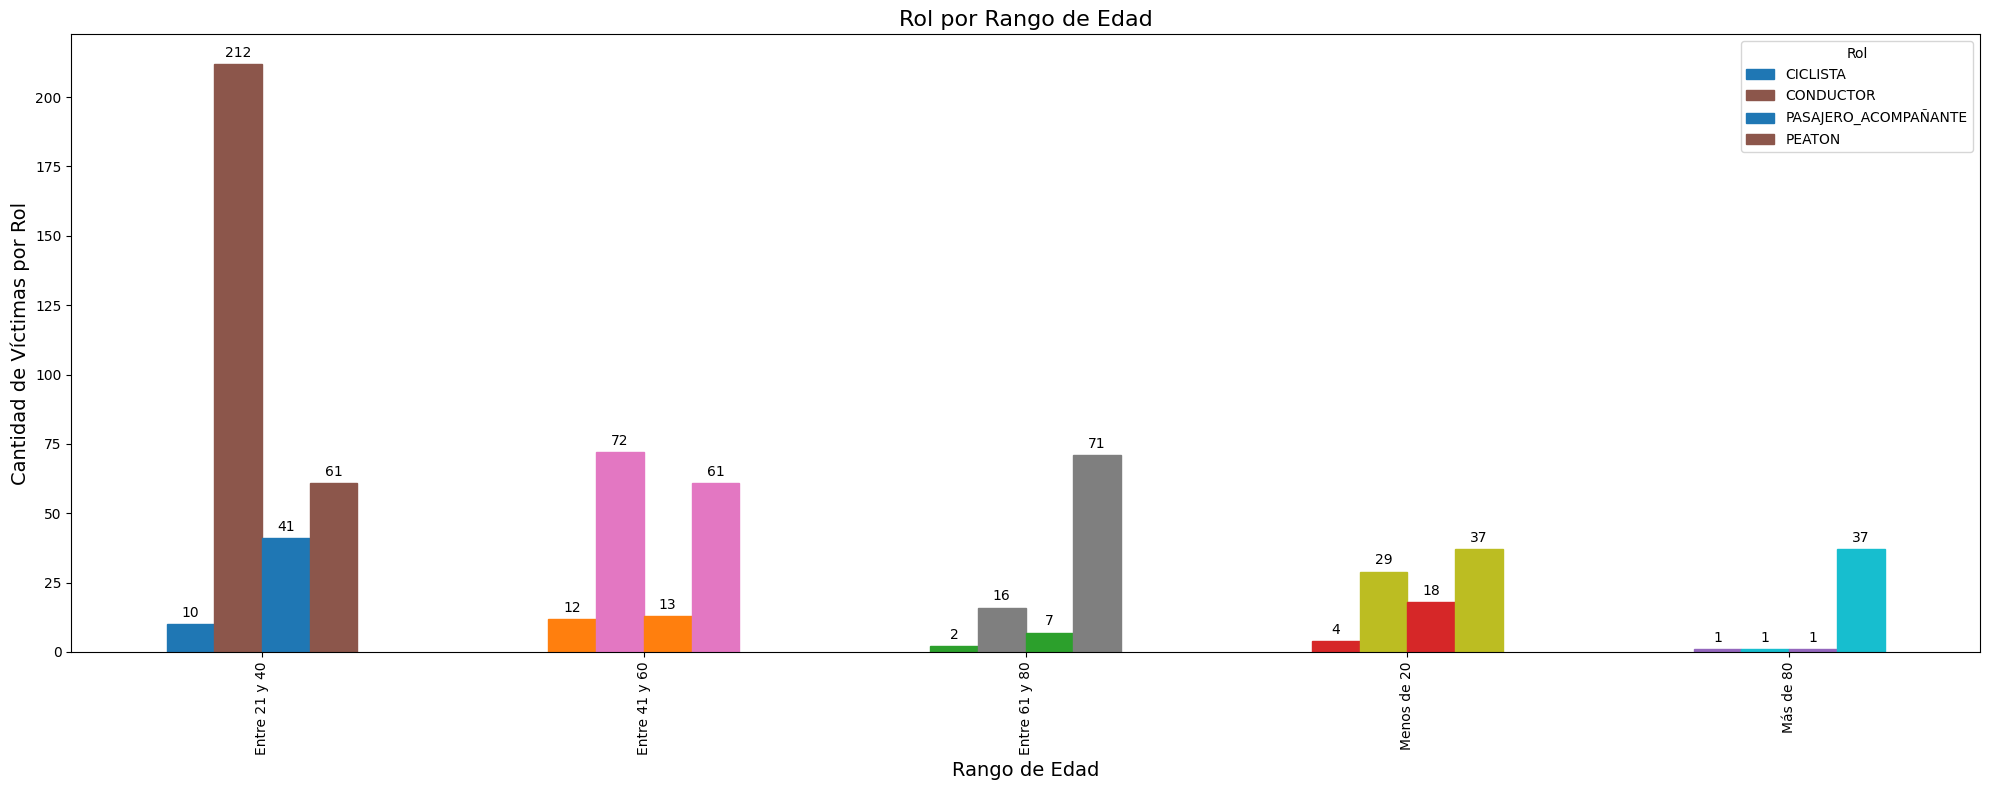

In [13]:

# Crear una figura y ejes con plt.subplots() y especificar el tamaño de la figura
fig, ax = plt.subplots(figsize=(20, 8))  

# Filtrar el DataFrame para excluir "SD" en la columna de Rol
siniestro_sin_sd = siniestro[siniestro["Rol"] != "SD"]

# Agrupar los datos por Rango etario y Rol, y crear el gráfico de barras apiladas
siniestro_sin_sd.groupby(["Rango etario", "Rol"]).size().unstack().plot(kind="bar", stacked=False, ax=ax)

# Definir colores distintos para cada categoría de rol
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Aplicar los colores al gráfico de barras
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i % len(colors)])

# Añadir etiquetas de datos dentro de cada barra
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

# Añadir una leyenda explicativa
ax.legend(title="Rol", loc="upper right")

# Etiquetas de los ejes y título
ax.set_xlabel("Rango de Edad", fontsize=14)  # Ajustar el tamaño de la letra
ax.set_ylabel("Cantidad de Víctimas por Rol", fontsize=14)  # Ajustar el tamaño de la letra
ax.set_title("Rol por Rango de Edad", fontsize=16)  # Ajustar el tamaño de la letra

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Conclusion:**
- Los mas accidentados son personas entre 21 y 40 años, especificamente los conductores. 
- Para el grupo etario de 61-90 años los mas accidentados son los peatones.

### Accidentes por rol, diferenciado por sexo

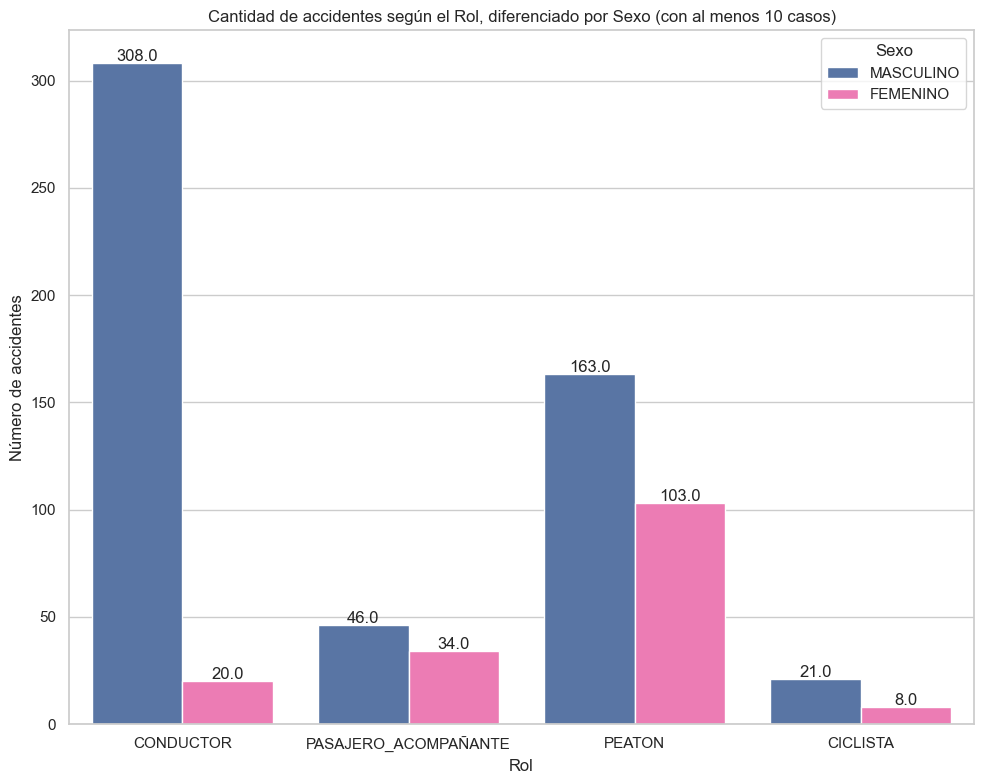

In [14]:
# Filtrar el DataFrame para incluir solo tipos de víctimas con al menos 10 casos
roles_con_suficientes_casos = (
    siniestro["Rol"].value_counts()[siniestro["Rol"].value_counts() >= 10].index
)

# Excluir el rol "SD"
roles_con_suficientes_casos = roles_con_suficientes_casos[roles_con_suficientes_casos != "SD"]

# Filtrar el DataFrame para excluir "SD" y solo incluir roles con suficientes casos
df_filtrado = siniestro[(siniestro["Rol"].isin(roles_con_suficientes_casos)) & (siniestro["Sexo"] != "SD")]

# Rol por Sexo
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
ax = sns.countplot(x="Rol", hue="Sexo", data=df_filtrado, palette=["b", "hotpink"])  # Invertir colores
plt.title("Cantidad de accidentes según el Rol, diferenciado por Sexo (con al menos 10 casos)")
plt.xlabel("Rol")
plt.ylabel("Número de accidentes")
plt.legend(title="Sexo", loc="upper right")


# Agregar contadores a las columnas
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height}', 
        (p.get_x() + p.get_width() / 2., height), 
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

**Conclusion:**
- Podemos observar que en general los hombres son los mas accidentados, siendo los conductores y los peatones los principales afectados.
- En el caso de las mujeres, las mas afectadas son las peatones, seguidos de los pasajero_acompañantes.

### Victimas totales por cada siniestro

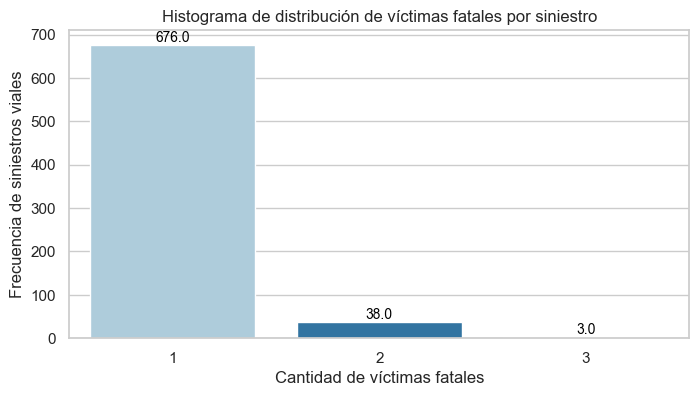

In [15]:
# Establecer el tamaño de la figura
plt.figure(figsize=(8, 4))

# Filtrar los valores sin datos o nulos
df_filtrado = siniestro[siniestro["Num víctimas"] != 0]

# Crear el histograma
ax = sns.countplot(data=df_filtrado, x='Num víctimas', palette="Paired")

# Agregar etiquetas y título
plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

# Agregar contador en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el histograma
plt.show()

In [16]:
# Cantidad de victimas fatales en cada siniestro vial 
siniestro["Num víctimas"].describe()

count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Num víctimas, dtype: float64

**Conclusión**:

* En el 75%  de los casos las victimas fatales son 1.
* Rara vez resulta un siniestro con 3 víctimas fatales

___
# 3_ Análisis temporales 

### Victimas por hora

In [17]:
siniestro["Hora"].describe()

count    716.000000
mean      11.554469
std        6.700055
min        0.000000
25%        6.000000
50%       11.000000
75%       17.000000
max       23.000000
Name: Hora, dtype: float64

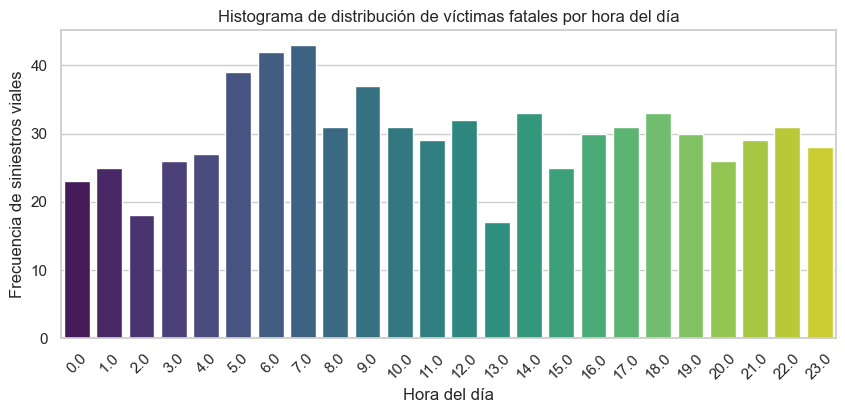

In [18]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=siniestro, x='Hora', palette="viridis")
plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Hora del día")
plt.title("Histograma de distribución de víctimas fatales por hora del día")
plt.xticks(rotation=45)
plt.show()

 **Conclusión:**
* El pico de los siniestros fatales ocurren 5 y 7 de la mañana.
* El 75% de los siniestros ocurren entre las 15 y 19 horas.

### Victimas por dia de semana

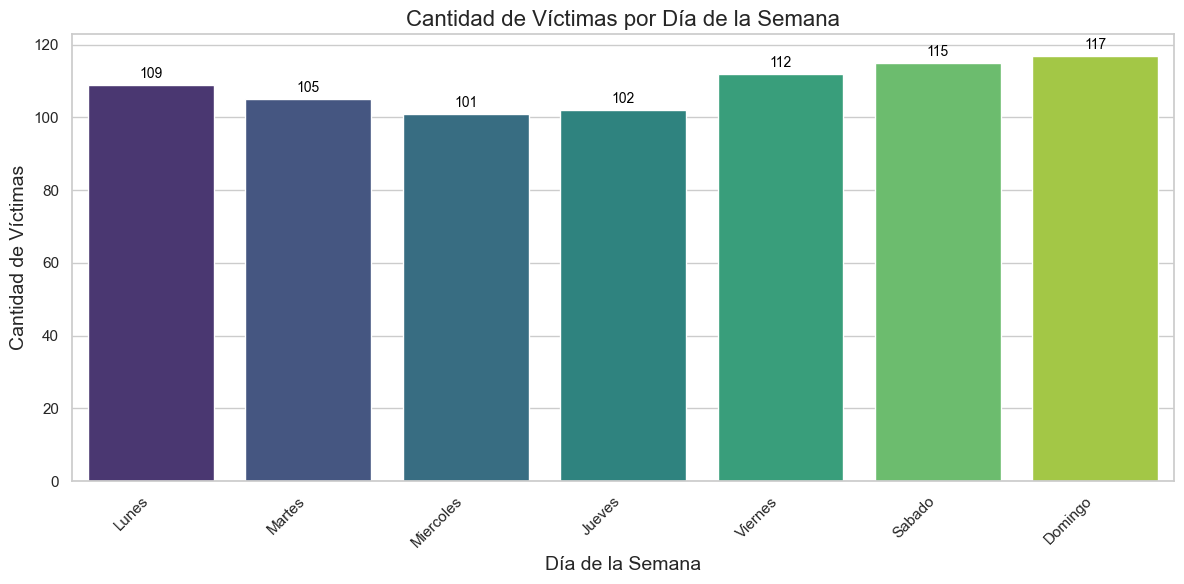

In [19]:
# Agrupa por la cantidad de víctimas por día semana
data = siniestro.groupby(['Día semana'])['Num víctimas'].sum().reset_index()

# Define el orden de los días de la semana
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Crea una columna 'Orden_dia_semana' en el DataFrame para representar el orden numérico de los días de la semana
data['Orden_dia_semana'] = data['Día semana'].apply(lambda x: orden_dias_semana.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
data = data.sort_values(by='Orden_dia_semana')

# Se grafica
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

ax = sns.barplot(x='Día semana', y='Num víctimas', data=data, palette="viridis")
ax.set_title('Cantidad de Víctimas por Día de la Semana', fontsize=16)
ax.set_xlabel('Día de la Semana', fontsize=14)
ax.set_ylabel('Cantidad de Víctimas', fontsize=14)

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8),
                textcoords='offset points')

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45, ha='right')

# Ajustar márgenes
plt.tight_layout()

# Se muestra el gráfico
plt.show()

**Conclusion:**
- Podemos observar que la mayor cantidad de victimas ocurre durante los fines de semana, en los dias sabado y domingo, seguidos por el dia lunes.

### Victimas por mes 

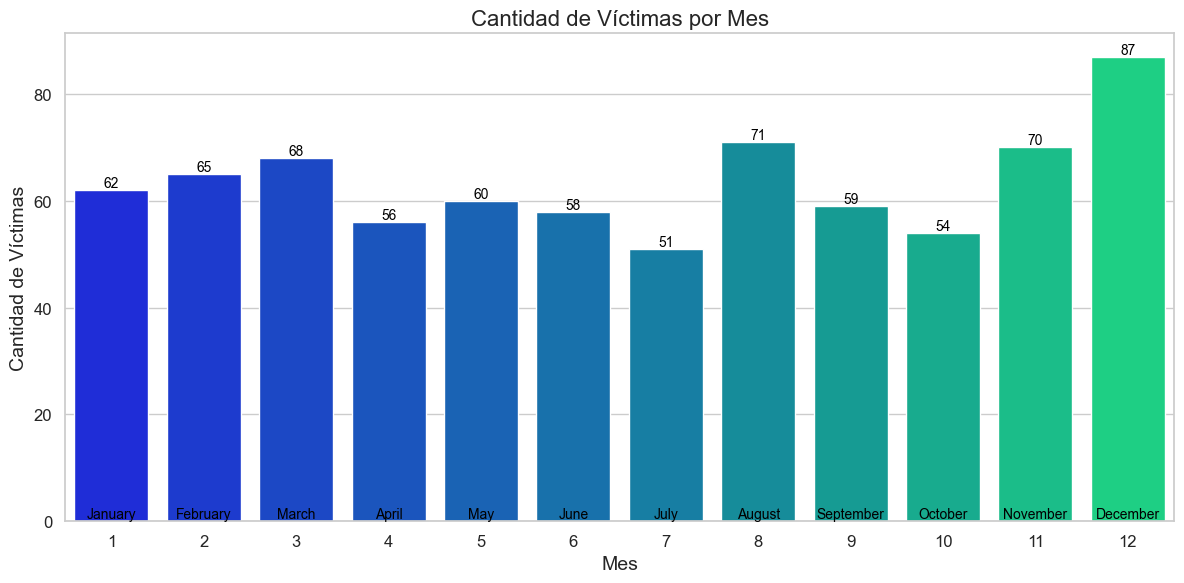

In [20]:
# Importar el módulo de calendario para obtener los nombres de los meses en español
import calendar

# Se agrupa por la cantidad de víctimas por mes
data = siniestro.groupby(['Mes'])['Num víctimas'].sum().reset_index()
data["Mes"]=data["Mes"].astype("Int64")

# Obtener nombres de los meses correspondientes a los números de mes en español
nombres_meses = [calendar.month_name[mes].capitalize() for mes in data['Mes']]

# Se grafica
plt.figure(figsize=(12,6))  # Ajustamos el tamaño del gráfico

# Utilizamos un esquema de color más agradable
colors = sns.color_palette("winter", len(data))

# Creamos el gráfico de barras
ax = sns.barplot(x='Mes', y='Num víctimas', data=data, palette=colors)
ax.set_title('Cantidad de Víctimas por Mes', fontsize=16)  # Añadimos un título más grande
ax.set_xlabel('Mes', fontsize=14) 
ax.set_ylabel('Cantidad de Víctimas', fontsize=14)

# Agregar etiquetas de número de víctimas en cada barra
for i, p in enumerate(ax.patches):
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    # Agregar el nombre del mes correspondiente
    ax.annotate(nombres_meses[i], (p.get_x() + p.get_width() / 2., 0),
                ha='center', va='top', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Personalizar el estilo de los ejes
ax.tick_params(axis='x', labelsize=12)  # Tamaño de la etiqueta del eje x
ax.tick_params(axis='y', labelsize=12)  # Tamaño de la etiqueta del eje y

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Conclusion:**
- Los meses con mas accidentes son agosto y diciembre. 

### Victimas por año


In [21]:
# Agrupar por año y mes, y sumar el número de víctimas
rel_tiempo = siniestro.groupby(['Año', 'Mes'])['Num víctimas'].sum().reset_index()

# Convertir el tipo de dato de Año y Mes a int
rel_tiempo["Año"] = rel_tiempo["Año"].astype(int)
rel_tiempo["Mes"] = rel_tiempo["Mes"].astype(int)

# Combinar AÑO y MES para obtener una sola variable de tiempo, creando la columna "Fecha" como str
rel_tiempo["Fecha"] = rel_tiempo["Año"].astype(str) + '-' + rel_tiempo["Mes"].astype(str)

# Convertir la variable de tiempo a formato datetime
rel_tiempo["Fecha"] = pd.to_datetime(rel_tiempo["Fecha"], format='%Y-%m')

# Ordenar el DataFrame por fecha para que tenga orden cronológico
rel_tiempo = rel_tiempo.sort_values("Fecha")

In [22]:
rel_tiempo

,Año,Mes,Num víctimas,Fecha
0,2016,1,8,2016-01-01
1,2016,2,12,2016-02-01
2,2016,3,15,2016-03-01
3,2016,4,11,2016-04-01
4,2016,5,7,2016-05-01
...,...,...,...,...
67,2021,8,9,2021-08-01
68,2021,9,4,2021-09-01
69,2021,10,5,2021-10-01
70,2021,11,8,2021-11-01


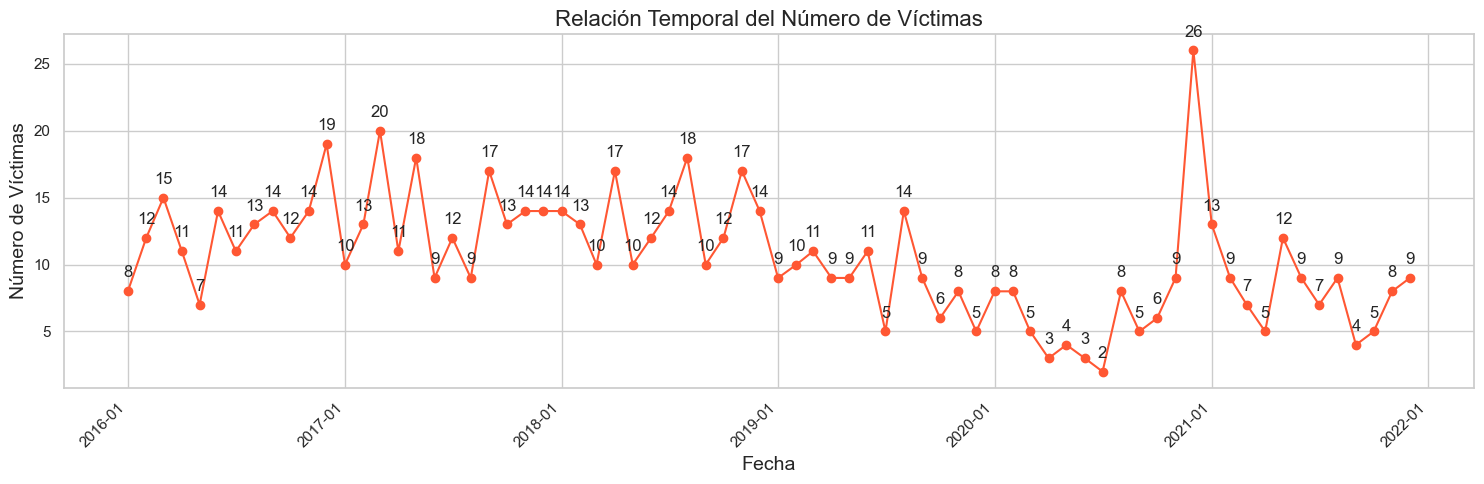

In [23]:
# Crear el gráfico de líneas
plt.figure(figsize=(15, 5))
plt.plot(rel_tiempo["Fecha"], rel_tiempo["Num víctimas"], marker='o', color='#FF5733', linestyle='-')

# Agregar contador en cada punto
for i, txt in enumerate(rel_tiempo["Num víctimas"]):
    plt.annotate(txt, (rel_tiempo["Fecha"][i], rel_tiempo["Num víctimas"][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Añadir títulos y etiquetas
plt.title('Relación Temporal del Número de Víctimas', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Número de Víctimas', fontsize=14)

# Rotar las etiquetas del eje x para mejor legibilidad y ajustar el formato de las fechas
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

# Añadir una cuadrícula para una mejor referencia visual
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Conclusión:**

* Las fechas con mayor cantidad de siniestros fatales se dan durante 2017 y 2018; luego se percibe una disminución sostenida en los siguientes años. 

* Durante el año 2020 debido a la pandemia COVID19; bajaron las estadísticas de siniestros viales, ya que la gente no manejaba tanto.
* A finales de 2020 se puede ver un pico, superando el mayor número de víctimas mesuales a lo largo de los años analizados (26 víctimas fatales).

___
# 4_ Análisis espacial de victimas

### Distribución espacial de los siniestros con Coordenadas

In [24]:
siniestro.columns

Index(['ID', 'Rol', 'Acusado', 'Victima', 'Sexo', 'Edad', 'Rango etario',
       'Año', 'Mes', 'Día', 'Día semana', 'Hora', 'Hora completa',
       'Num víctimas', 'Participantes', 'Fecha fallecimiento',
       'Lugar del hecho', 'Tipo de calle', 'Calle', 'Cruce',
       'Dirección normalizada', 'Comuna', 'Barrios', 'Coordenada', 'Pos x',
       'Pos y'],
      dtype='object')

In [33]:
#Opcional si no lo tenes: 
# %pip install pandas geopandas shapely matplotlib


# Definir el sistema de referencia de coordenadas (CRS)
crs = 'EPSG:4326'  # Especificar el CRS usando el formato adecuado

# Crear la geometría a partir de las columnas de coordenadas
geometry = [Point(xy) for xy in zip(siniestro["Pos x"], siniestro["Pos y"])]

# Crear un GeoDataFrame usando el DataFrame original, CRS y geometría
geodata = gpd.GeoDataFrame(siniestro, crs=crs, geometry=geometry)

Una vez que el mapa de geometría está listo, se debe cargar el archivo de las comunas del la ciudad de Buenos Aires que se extrajo de https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource que debe ser un archivo Shapefile (SHP)

In [26]:
# Extraer el archivo shapefile de las comunas de Buenos Aires
shapefile = gpd.read_file(r"../0 Dataset/comunas_wgs84.shp")

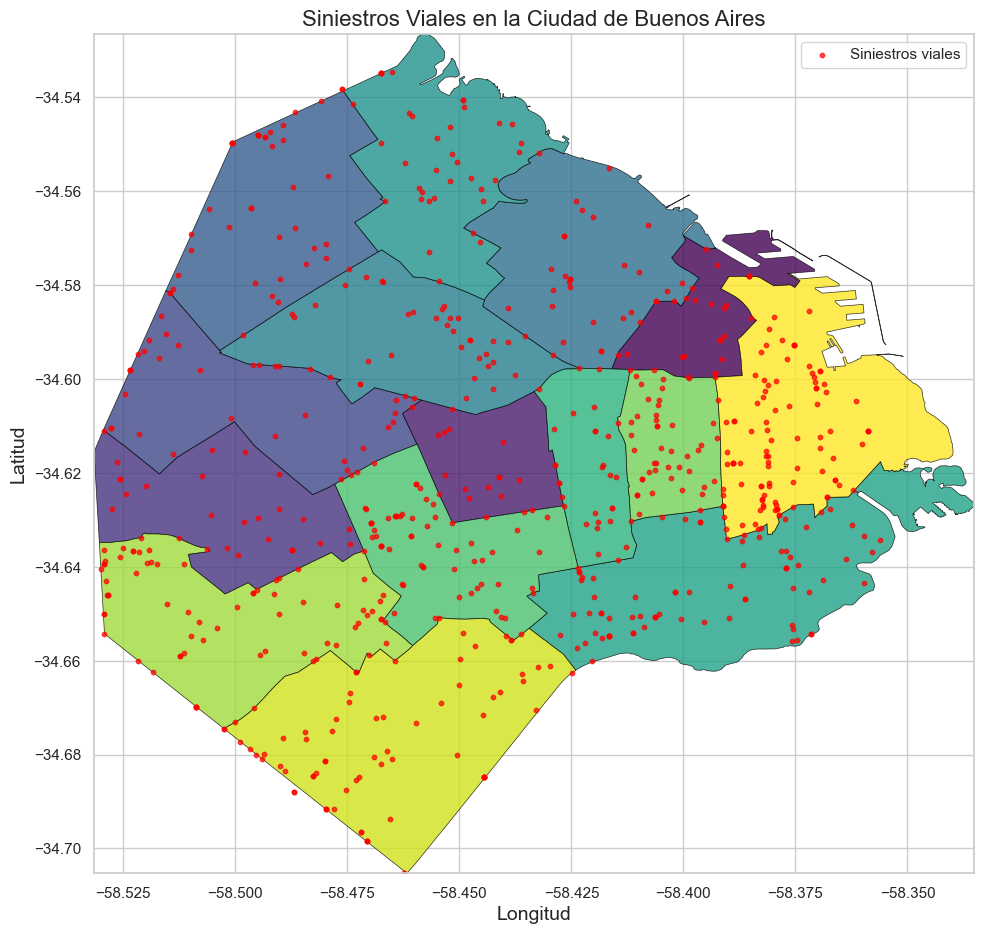

In [27]:
# Crear ejes y figura
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar el Shapefile
shapefile.plot(ax=ax, facecolor='lightgrey', edgecolor='black', alpha=0.8, linewidth=0.5, cmap="viridis", legend=True)

# Dibujar los datos geoespaciales de los siniestros viales
geodata.plot(ax=ax, color='red', markersize=10, alpha=0.7, label='Siniestros viales')

# Agregar título y etiquetas de ejes
plt.title('Siniestros Viales en la Ciudad de Buenos Aires', fontsize=16)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitud', fontsize=14)

# Ajustar los límites del gráfico para centrarse en Buenos Aires
ax.set_xlim(shapefile.total_bounds[[0, 2]])
ax.set_ylim(shapefile.total_bounds[[1, 3]])

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

___

### Victimas por Comunas

In [28]:
totales = (
    siniestro.groupby(["Comuna", "Barrios"])["Num víctimas"]
    .sum()
    .reset_index()
)
totales = totales.sort_values(by="Num víctimas", ascending=False)
totales.sample(3)

,Comuna,Barrios,Num víctimas
6,COMUNA 15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,47
7,COMUNA 2,RECOLETA,25
12,COMUNA 7,FLORES - PARQUE CHACABUCO,66


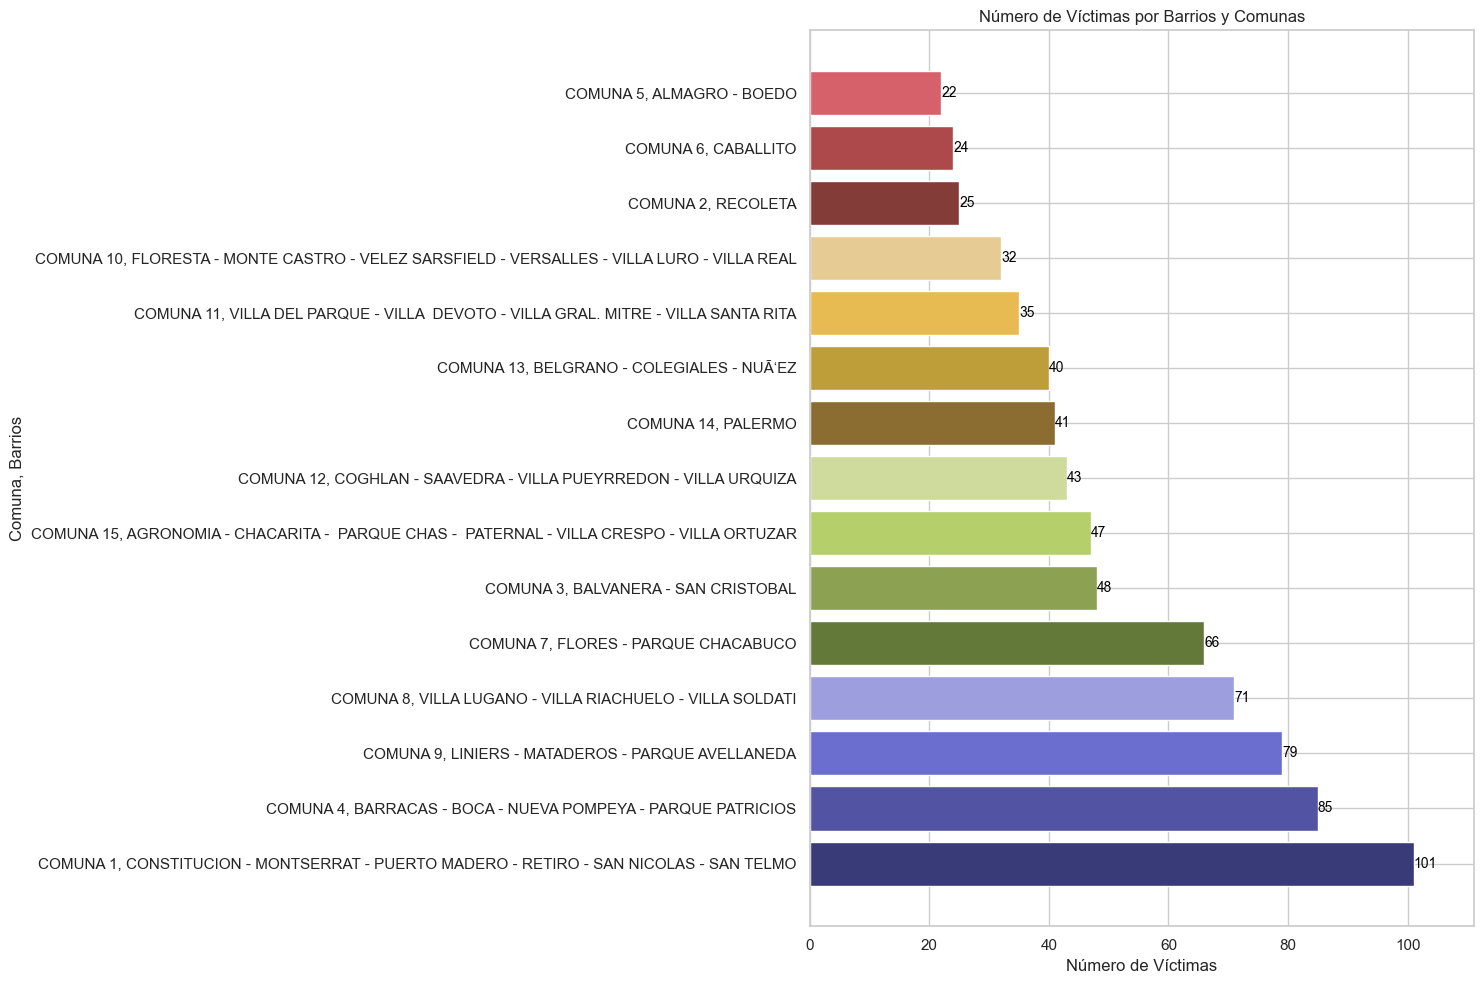

In [29]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(15, 10))

# Colores para las barras
colores = plt.cm.tab20b(range(len(totales)))

# Dibujar las barras horizontales
plt.barh(totales["Comuna"] + ", " + totales["Barrios"], totales["Num víctimas"], color=colores)

# Etiquetas de eje x e y
plt.xlabel('Número de Víctimas')
plt.ylabel('Comuna, Barrios')

# Título del gráfico
plt.title('Número de Víctimas por Barrios y Comunas')

# Agregar el número de víctimas sobre cada barra
for i, v in enumerate(totales["Num víctimas"]):
    plt.text(v, i, str(v), va='center', fontsize=10, color='black')

# Añadir un margen adicional en el eje x
plt.xlim(right=max(totales["Num víctimas"]) * 1.1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [30]:
barrios_comuna_1 = totales[totales["Comuna"] == "COMUNA 1"]["Barrios"].tolist()
print(barrios_comuna_1)

['CONSTITUCION - MONTSERRAT - PUERTO MADERO - RETIRO - SAN NICOLAS - SAN TELMO']


**Conclusión**
- El dataset presenta el total de 15 comunas que conforman los distintos barrios de CABA. Cada comuna esta formada por uno o varios Barrio
- La comuna 1 es la que mas siniestros tiene, esta formada por los barrios: 
  - PUERTO MADERO
  - RETIRO
  - SAN NICOLAS
  - SAN TELMO

___

###  Tipos de Calles donde suceden los siniestros

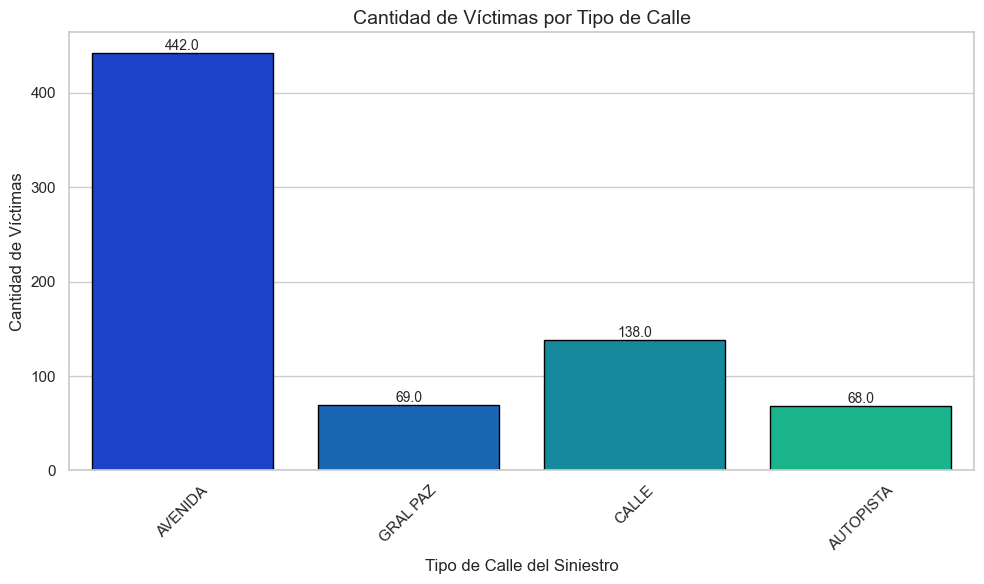

In [31]:
# Establecer el estilo del gráfico
sns.set_style("whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=siniestro, x='Tipo de calle', palette="winter", edgecolor='black')

# Agregar el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

# Titular los ejes y el gráfico
plt.xlabel('Tipo de Calle del Siniestro', fontsize=12)
plt.ylabel('Cantidad de Víctimas', fontsize=12)
plt.title('Cantidad de Víctimas por Tipo de Calle', fontsize=14)

# Ajustar el diseño del gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.tight_layout()  # Ajustar el diseño del gráfico para evitar que las etiquetas se solapen

# Mostrar el gráfico
plt.show()

**Conclusion:**
- Podemos observar que la mayoria de los accidentes ocurren en AVENIDA.

### Victimas totales por medio de transporte, diferenciado por Sexo

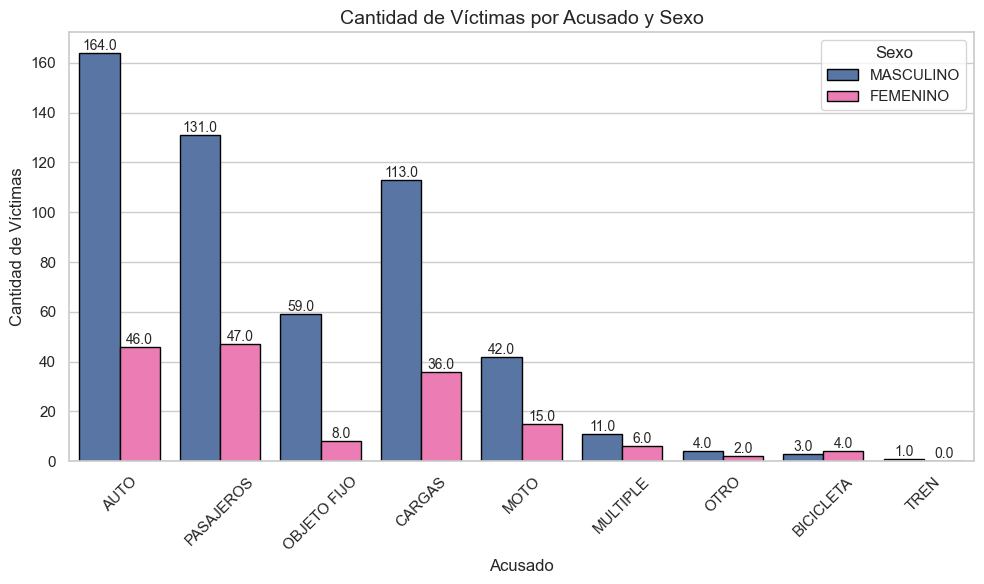

In [32]:
# Filtrar el DataFrame para excluir "SD" en las columnas de Sexo y Acusado
siniestro_filtrado = siniestro[(siniestro["Sexo"] != "SD") & (siniestro["Acusado"] != "SD")]

# Establecer el estilo del gráfico
sns.set_style("whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=siniestro_filtrado, x="Acusado", hue="Sexo", palette=["b", "hotpink"], edgecolor="black"
)

# Añadir contadores en las barras
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Configuraciones adicionales del gráfico
plt.xlabel("Acusado", fontsize=12)
plt.ylabel("Cantidad de Víctimas", fontsize=12)
plt.title("Cantidad de Víctimas por Acusado y Sexo", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusion:**
- Los hombres suelen accidentarse mucho mas que las mujeres, las principales victimas conducian auto o eran pasajeros.
- Para las mujeres, vemos que es mas parejo en auto y pasajeros, con una diferencia minima.

___